# Data Drift Measures and Tests Notebook for Tabular Data

### Features 
- Automatic bin size selection for continous features based on sample size


### Unit Tests
- Assert that no drift measures are minimal for datasets taken from the same distribution
- Assert that drift measures are independent of sample size

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from utils import numerical_data_distribution_plot, categorical_grouped_bar_plot, jensen_shannon_numerical, jensen_shannon_categorical, normed_wasserstein_numerical

### Numerical Data

In [2]:
observations = 100000
w = np.random.normal(50, 15, int(observations/100)) # identical with x
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(51, 17, int(observations/10)) # minor drift
z = np.random.normal(62, 20, int(observations/1000)) # major drift 

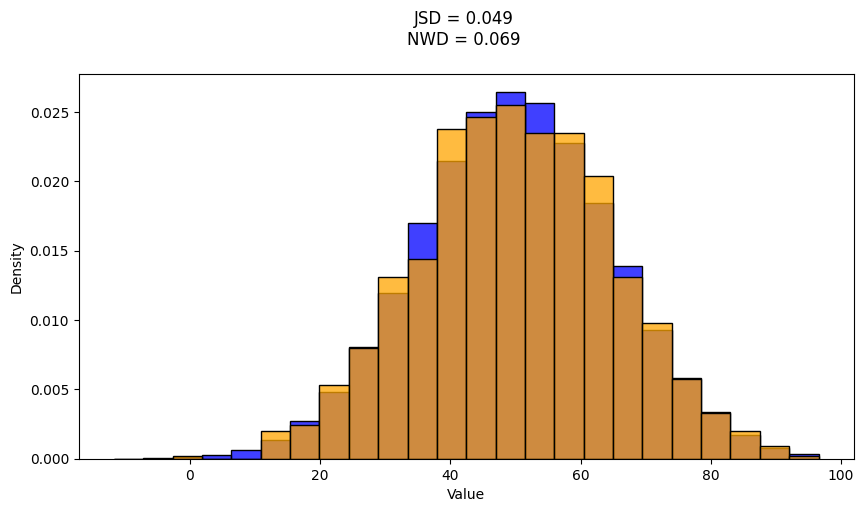

In [3]:
g = numerical_data_distribution_plot(x, w)

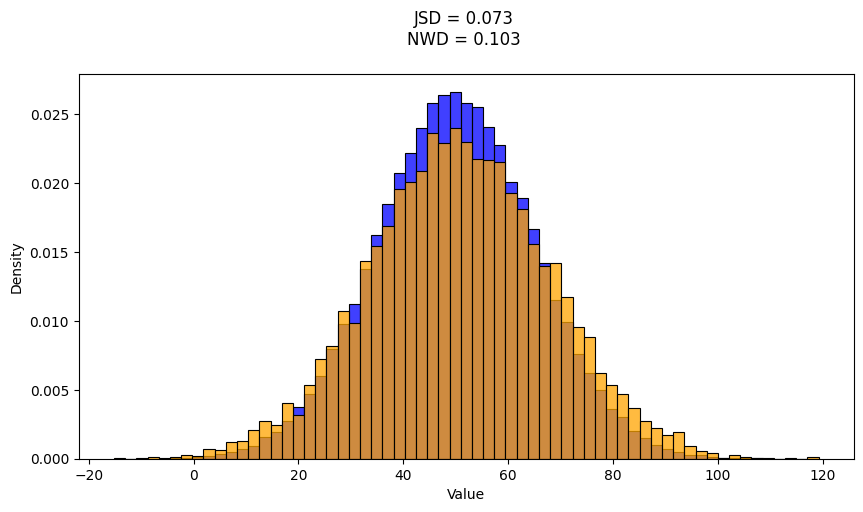

In [4]:
g = numerical_data_distribution_plot(x, y)


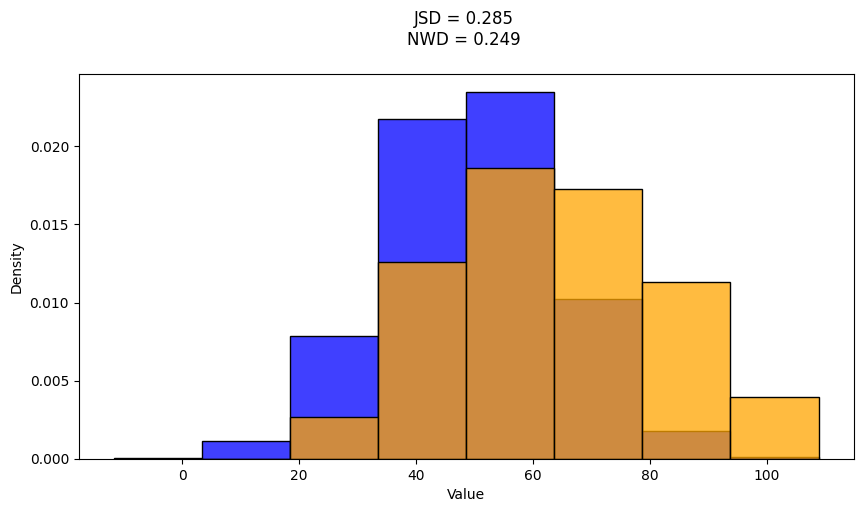

In [5]:
g = numerical_data_distribution_plot(x, z)

### Categorical Data

In [6]:
# Sample strings to generate categorical variables: a and b differ slightly. Strong difference between a versus c
a = 100 * 'a' + 100 * 'b' + 100 * 'c' + 100 * 'd' + 100 * 'e' + 100 * 'f' + 100 * 'g' + 100 * 'h'
b = 97 * 'a' + 105 * 'b' + 99 * 'c' + 98 * 'd' + 100 * 'e' + 102 * 'f' + 102 * 'g' + 97 * 'h'
#b = 10 * 'a' + 10 * 'b' + 10 * 'c' + 10 * 'd' + 10 * 'e' + 10 * 'f' + 10 * 'g' + 10 * 'h'
c = 81 * 'a' + 119 * 'b' + 75 * 'c' + 123 * 'd' + 67 * 'e' + 147 * 'f' + 58 * 'g' + 104 * 'h'
d = 81 * 'a' + 119 * 'b' + 75 * 'c' + 123 * 'd' + 67 * 'e' + 147 * 'f' + 84 * 'g' + 5000 * 'h'

# convert to lists
a_list = [letter for letter in a]
b_list = [letter for letter in b]
c_list = [letter for letter in c]
d_list = [letter for letter in d]

# shuffle lists
random.shuffle(a_list)
random.shuffle(b_list)
random.shuffle(c_list)
random.shuffle(d_list)

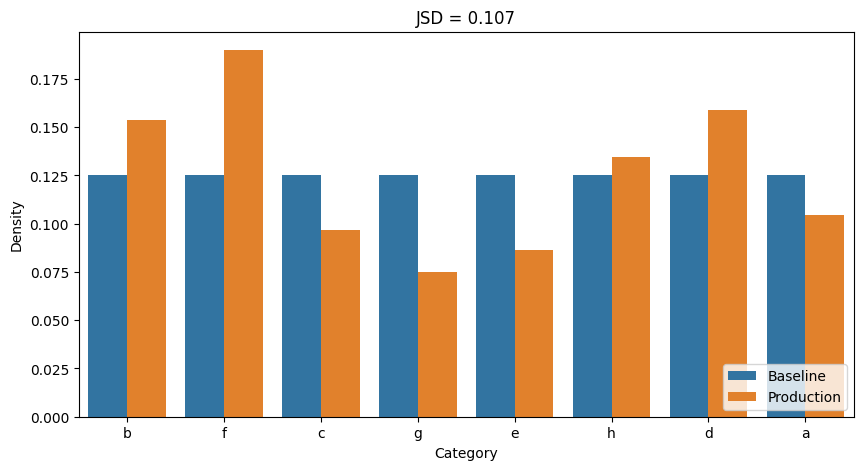

In [7]:
h = categorical_grouped_bar_plot(a_list, c_list)

In [9]:
sample_size = 100_000
x1 = np.random.normal(50, 15, sample_size) # reference
x10 = np.random.normal(50, 15, int(sample_size/10)) # reference
x100 = np.random.normal(50, 15, int(sample_size/100)) # reference

y1 = np.random.normal(62, 20, sample_size) # major drift 
y10 = np.random.normal(62, 20, int(sample_size/10)) # major drift 
y100 = np.random.normal(62, 20, int(sample_size/100)) # major drift 

#Test 1: Drift shoud be close to 0 for identical distributions and sample size invariant
t1_jsd1 = jensen_shannon_numerical(x1, x1)
t1_jsd10 = jensen_shannon_numerical(x1, x10)
t1_jsd100 = jensen_shannon_numerical(x1, x100)

t1_nwd1 = normed_wasserstein_numerical(x1, x1)
t1_nwd10 = normed_wasserstein_numerical(x1, x10)
t1_nwd100 = normed_wasserstein_numerical(x1, x100)
# --------------------------------------------------------------------------------


#Test 2: Drift measure remain roughly for identical distributions of different sample sizes
t2_jsd1 = jensen_shannon_numerical(x1, y1)
t2_jsd10 = jensen_shannon_numerical(x1, y10)
t2_jsd100 = jensen_shannon_numerical(x1, y100)

t2_nwd1 = normed_wasserstein_numerical(x1, y1)
t2_nwd10 = normed_wasserstein_numerical(x1, y10)
t2_nwd100 = normed_wasserstein_numerical(x1, y100)
# --------------------------------------------------------------------------------

print("Test 1: Drift shoud be close to 0 for identical distributions and sample size invariant") 
print("Expected: (0,0,0)") 
print(f"JSD: ({t1_jsd1},{t1_jsd10},{t1_jsd100})")
print(f"NWD: ({t1_nwd1},{t1_nwd10},{t1_nwd100})")
print("")

print("Test 2: Drift measure remain roughly for identical distributions of different sample sizes") 
print("Expected: (a,a,a)") 
print(f"JSD: ({t2_jsd1},{t2_jsd10},{t2_jsd100})")
print(f"NWD: ({t2_nwd1},{t2_nwd10},{t2_nwd100})")
#Do the same for categorical variables

Test 1: Drift shoud be close to 0 for identical distributions and sample size invariant
Expected: (0,0,0)
JSD: (0.0,0.029,0.041)
NWD: (0.0,0.031,0.053)

Test 2: Drift measure remain roughly for identical distributions of different sample sizes
Expected: (a,a,a)
JSD: (0.264,0.261,0.274)
NWD: (0.21,0.216,0.2)
